# EDA: Combined per 60 statistics
Goal is to determine what statistics about goalies and skaters may be useful in predicting goals scored for each skater's upcoming games.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Read in feature set

In [27]:
# Read in data
feature_set_2021 = pd.read_csv('../data/feature_set_2021.csv')
feature_set_2022 = pd.read_csv('../data/feature_set_2022.csv')
feature_set_all = pd.concat([feature_set_2021, feature_set_2022], axis=0).reset_index(drop = True)

In [3]:
feature_set_all.sample(5)

,Unnamed: 0.1,Unnamed: 0,s_player_id,s_name,s_age,season,s_game_num,date,s_team,s_opponent,...,decision,g_n_completed_games,GA_60,SA_60,SV_60,total_shutout,SV_perc,g_avg_TOI,C_flag,PP_flag
24406,24406,24406,/l/lafreal01,Alexis Lafreniere,20,2022,53,2022-03-04,NYR,NJD,...,L,7,2.793152,30.724668,27.931516,0.0,0.909091,46.030952,0,0
37298,37298,37298,/r/royni01,Nicolas Roy,24,2022,12,2021-11-11,VEG,MIN,...,L,9,2.851225,29.718533,26.867308,0.0,0.904059,60.792593,1,0
25107,25107,25107,/s/scheima01,Mark Scheifele,27,2021,11,2021-02-04,WPG,CGY,...,L,7,2.274253,29.991708,27.717456,2.0,0.924171,60.302381,1,1
8544,8544,8544,/d/dadonev01,Evgenii Dadonov,32,2022,5,2021-10-24,VEG,NYI,...,W,5,2.802024,33.424140,30.622116,1.0,0.916168,59.956667,0,0
20291,20291,20291,/j/johnsan01,Andreas Johnsson,27,2022,26,2021-12-11,NJD,NYI,...,W,16,2.349599,32.687066,30.337467,3.0,0.928118,57.882222,0,0


### What is the distribution of goals in the data?

0    66734
1    10385
2     1149
3      151
4       10
5        1
Name: G, dtype: int64


<Axes: xlabel='G', ylabel='count'>

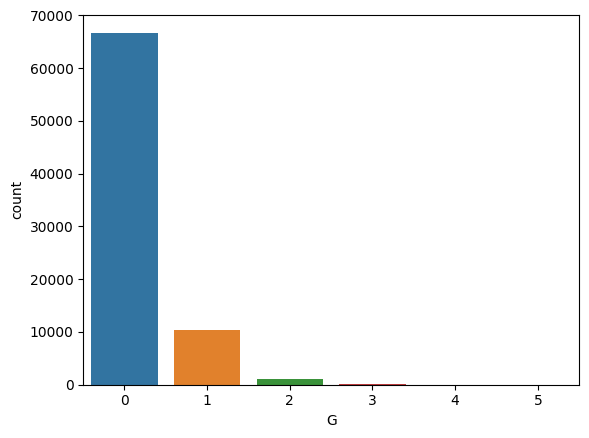

In [4]:
print(feature_set_all['G'].value_counts())
sns.countplot(data=feature_set_all, x = 'G')

Notice that we will be working with really imbalanced data where there are far more 0's than 1-5's.

### Difference in means feature importance

In [14]:
feature_set_all.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 's_player_id', 's_name', 's_age',
       'season', 's_game_num', 'date', 's_team', 's_opponent',
       's_home_away_status', 's_result', 'G', 's_n_completed_games', 'G_60',
       'A_60', 'P_60', 'rating_60', 'PIM_60', 'EVG_60', 'PPG_60', 'SHG_60',
       'GWG_60', 'EVA_60', 'PPA_60', 'SHA_60', 'S_60', 'shifts_60', 'HIT_60',
       'BLK_60', 'FOW_60', 'FOL_60', 's_avg_TOI', 'g_player_id', 'g_name',
       'g_age', 'g_game_num', 'decision', 'g_n_completed_games', 'GA_60',
       'SA_60', 'SV_60', 'total_shutout', 'SV_perc', 'g_avg_TOI', 'C_flag',
       'PP_flag'],
      dtype='object')

In [15]:
feature_set_inputs = feature_set_all.loc[:, ['G', 's_home_away_status', 'G_60', 'A_60', 'P_60', 'rating_60', 'PIM_60',
       'EVG_60', 'PPG_60', 'SHG_60', 'GWG_60', 'EVA_60', 'PPA_60', 'SHA_60',
       'S_60', 'shifts_60', 'HIT_60', 'BLK_60', 'FOW_60', 'FOL_60', 's_avg_TOI', 'GA_60', 'SA_60', 'SV_60', 'total_shutout',
       'SV_perc', 'C_flag', 'PP_flag']]


scaler = StandardScaler()
scaler.fit(feature_set_inputs)

fs_inputs_scaled = scaler.transform(feature_set_inputs)

fs_inputs_scaled = pd.DataFrame(fs_inputs_scaled, columns = feature_set_inputs.columns)
display(fs_inputs_scaled)
print(fs_inputs_scaled.columns)

,G,s_home_away_status,G_60,A_60,P_60,rating_60,PIM_60,EVG_60,PPG_60,SHG_60,...,FOW_60,FOL_60,s_avg_TOI,GA_60,SA_60,SV_60,total_shutout,SV_perc,C_flag,PP_flag
0,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.046111,-0.871739,-0.914511,-0.704581,-0.338900,-0.561692,-0.67988
1,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,-0.593194,-0.637458,-1.706872,-0.113949,-0.211695,-0.198371,1.603942,0.033447,-0.561692,-0.67988
2,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.050683,1.870429,1.281062,-0.704581,-1.864871,-0.561692,-0.67988
3,-0.393451,0.999898,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,1.475912,3.755173,-0.463718,NaN,NaN,NaN,-0.704581,NaN,1.780334,-0.67988
4,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,1.432085,3.662129,-0.384984,-0.592644,1.595669,1.830193,-0.704581,1.065970,1.780334,-0.67988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78425,-0.393451,-1.000102,0.324605,-0.193866,0.052563,0.036977,0.222574,0.128093,0.595692,-0.195692,...,-0.593194,-0.548141,-0.523389,-0.055879,-0.619284,-0.644334,0.449681,-0.206877,-0.561692,-0.67988
78426,1.947673,0.999898,0.330817,-0.188712,0.059746,0.036977,0.226794,0.133057,0.600806,-0.195692,...,-0.593194,-0.547697,-0.541069,0.034965,-0.609564,-0.654981,0.449681,-0.298839,-0.561692,-0.67988
78427,-0.393451,-1.000102,0.746177,-0.191054,0.298244,0.213702,0.035530,0.632065,0.598482,-0.195692,...,-0.593194,-0.577752,-0.533058,1.285928,1.149361,0.923045,-0.704581,-0.705458,-0.561692,-0.67988
78428,-0.393451,-1.000102,0.751112,0.159967,0.545710,0.568715,0.037485,0.636501,0.601529,-0.195692,...,-0.593194,-0.577576,-0.543556,0.901494,0.637729,0.468776,-0.704581,-0.583218,-0.561692,-0.67988


Index(['G', 's_home_away_status', 'G_60', 'A_60', 'P_60', 'rating_60',
       'PIM_60', 'EVG_60', 'PPG_60', 'SHG_60', 'GWG_60', 'EVA_60', 'PPA_60',
       'SHA_60', 'S_60', 'shifts_60', 'HIT_60', 'BLK_60', 'FOW_60', 'FOL_60',
       's_avg_TOI', 'GA_60', 'SA_60', 'SV_60', 'total_shutout', 'SV_perc',
       'C_flag', 'PP_flag'],
      dtype='object')


In [16]:
fs_inputs_scaled['1_or_more_G'] = 0

mask = feature_set_inputs['G'] >= 1
mask = mask.to_numpy()

fs_inputs_scaled.loc[mask, '1_or_more_G'] = 1

In [17]:
fs_inputs_agg = fs_inputs_scaled.groupby('1_or_more_G').agg(np.mean).reset_index()
fs_inputs_agg

,1_or_more_G,G,s_home_away_status,G_60,A_60,P_60,rating_60,PIM_60,EVG_60,PPG_60,...,FOW_60,FOL_60,s_avg_TOI,GA_60,SA_60,SV_60,total_shutout,SV_perc,C_flag,PP_flag
0,0,-0.393451,-0.005796,-0.068161,-0.050893,-0.074871,-0.014634,0.010250,-0.052355,-0.056296,...,-0.034696,-0.033549,-0.024757,-0.009634,-0.010000,-0.008390,0.005629,0.005817,-0.029196,-0.063126
1,1,2.244918,0.033072,0.387637,0.289436,0.425800,0.083223,-0.058293,0.297750,0.320163,...,0.197318,0.190795,0.140793,0.055041,0.057132,0.047932,-0.032117,-0.033231,0.166587,0.360178


In [18]:
input_test = fs_inputs_agg.melt(id_vars=['1_or_more_G'],
       var_name='metric',
       value_name = 'value').pivot(index='metric', columns='1_or_more_G', values = 'value').reset_index()
input_test['diff'] = input_test.iloc[:,2] - input_test.iloc[:,1]
input_test['abs_diff'] = np.abs(input_test['diff'])
input_test.sort_values('abs_diff', ascending=False)

1_or_more_G,metric,0,1,diff,abs_diff
7,G,-0.393451,2.244918,2.638368,2.638368
16,P_60,-0.074871,0.425800,0.500671,0.500671
22,S_60,-0.072132,0.410225,0.482358,0.482358
10,G_60,-0.068161,0.387637,0.455798,0.455798
15,PP_flag,-0.063126,0.360178,0.423304,0.423304
14,PPG_60,-0.056296,0.320163,0.376459,0.376459
1,BLK_60,0.055342,-0.314738,-0.370080,0.370080
4,EVG_60,-0.052355,0.297750,0.350105,0.350105
0,A_60,-0.050893,0.289436,0.340329,0.340329
13,PPA_60,-0.046077,0.262044,0.308121,0.308121


In [19]:
top_10_features = input_test.sort_values('abs_diff', ascending=False).head(10)['metric'].to_numpy()
top_10_features

array(['G', 'P_60', 'S_60', 'G_60', 'PP_flag', 'PPG_60', 'BLK_60',
       'EVG_60', 'A_60', 'PPA_60'], dtype=object)

### Distribution of top 10 features stratified by goals

In [38]:
def aggregate(df, col):
    agg = df.groupby('G')[col].mean().reset_index()
    display(agg)
    sns.displot(data = df, x = col, hue = 'G', kind='kde', fill = True)
    return

,G,P_60
0,0,1.520555
1,1,2.050920
2,2,2.445118
3,3,2.637197
4,4,2.242846
5,5,3.272727


/var/folders/yk/qhxv13m50bl7fyrpnntydjgh0000gn/T/ipykernel_45722/1522045893.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df, x = col, hue = 'G', kind='kde', fill = True)


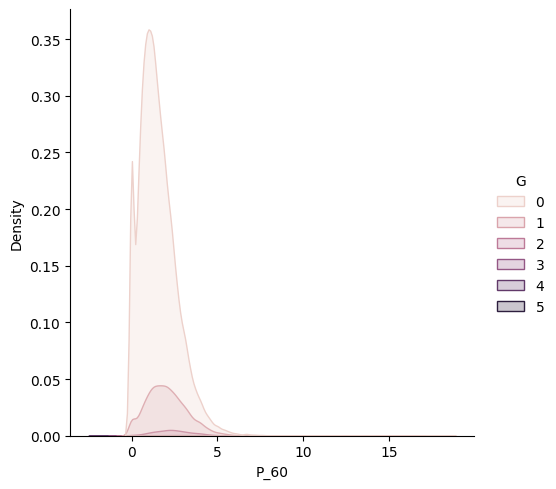

In [48]:
aggregate(feature_set_all, top_10_features[1])

### What kind of interactions may be present?

In [50]:
feature_set_all.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 's_player_id', 's_name', 's_age',
       'season', 's_game_num', 'date', 's_team', 's_opponent',
       's_home_away_status', 's_result', 'G', 's_n_completed_games', 'G_60',
       'A_60', 'P_60', 'rating_60', 'PIM_60', 'EVG_60', 'PPG_60', 'SHG_60',
       'GWG_60', 'EVA_60', 'PPA_60', 'SHA_60', 'S_60', 'shifts_60', 'HIT_60',
       'BLK_60', 'FOW_60', 'FOL_60', 's_avg_TOI', 'g_player_id', 'g_name',
       'g_age', 'g_game_num', 'decision', 'g_n_completed_games', 'GA_60',
       'SA_60', 'SV_60', 'total_shutout', 'SV_perc', 'g_avg_TOI', 'C_flag',
       'PP_flag'],
      dtype='object')

In [52]:
feature_set_all.groupby(['G', 'C_flag'])[['FOW_60', 'FOL_60']].mean().reset_index()

,G,C_flag,FOW_60,FOL_60
0,0,0,0.699219,0.932316
1,0,1,21.432787,21.109549
2,1,0,0.978306,1.296119
3,1,1,22.393829,21.531188
4,2,0,1.050816,1.314883
5,2,1,23.439233,21.512948
6,3,0,1.306260,1.610136
7,3,1,23.001017,21.348692
8,4,0,1.909519,1.632977
9,4,1,31.567006,25.733599


In [55]:
print(feature_set_all['G'].mean())
print(feature_set_all['G'].var())

0.1680606910620936
0.18245536767153148
